In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [102]:
data=pd.read_csv("C:/Users/Wahab/Documents/DSA/Sales_add.csv")
data

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [103]:
data.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

In [104]:
from statsmodels.stats.weightstats import ztest

In [105]:
z_stat,p_val=ztest(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'],value=0)

In [106]:
p_val

1.3046367348248653e-38

In [107]:
if p_val<0.05:
    print('Null Hypothesis Rejected')
else:
    print('Null Hypothesis Accepted')

Null Hypothesis Rejected


# Since null hypothesis rejected, there is an increase in sales afterstepping into digital marketing.

In [108]:
data.dtypes

Month                             object
Region                            object
Manager                           object
Sales_before_digital_add(in $)     int64
Sales_After_digital_add(in $)      int64
dtype: object

### Question 2

The company needs to check whether there is any dependency between
thefeatures “Region” and “Manager”.

In [109]:
import scipy.stats as stats

In [110]:
contigency1= pd.crosstab(data['Region'], data['Manager'])
contigency1

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [111]:
contigency_pct = pd.crosstab(data['Region'], data['Manager'], normalize='index')
contigency_pct

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,0.400000,0.300000,0.300000
Region - B,0.571429,0.142857,0.285714
Region - C,0.200000,0.600000,0.200000


<AxesSubplot:xlabel='Manager', ylabel='Region'>

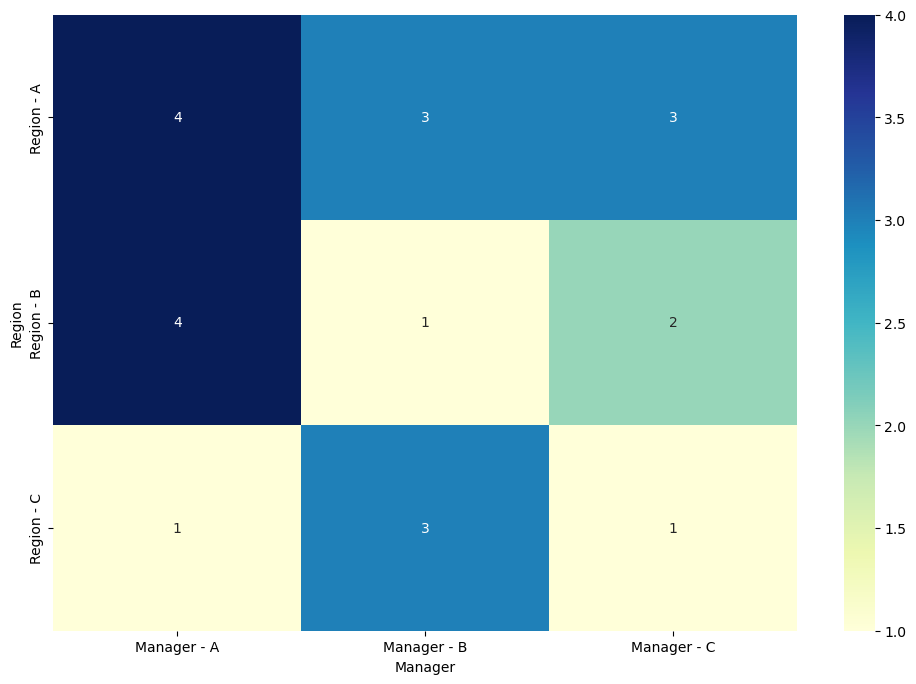

In [118]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency1, annot=True, cmap="YlGnBu")

In [113]:
from scipy.stats import chisquare

In [114]:
from scipy.stats import chi2_contingency

In [115]:
chi2_stat,pval,dof,exp = chi2_contingency(contigency1)


In [116]:
pval

0.5493991051158094

In [117]:
if pval<0.05:
    print('Null Hypothesis Rejected')
else:
    print('Null Hypothesis Accepted')

Null Hypothesis Accepted
